In [1]:
import os
import logging
import pandas as pd

from stellr import Star

In [7]:
sun = {
#     'name': 'SUN',
    'mass': 1.0, 'mass_err': 0.001,
    'age': 4.6, 'age_err': 0.1,
    'teff': 5777., 'teff_err': 20.,
    'rad': 1.0, 'rad_err': 0.001,
    'lum': 1.0, 'lum_err': 0.01,
    'dnu': 135.1, 'dnu_err': 0.2,
    'mhs': 0.0, 'mhs_err': 0.01,
}

In [8]:
observed = {
#     'stars': pd.DataFrame(sun, index=[0])
    'star': sun
}

In [9]:
stars = Star(name='SUN', path='sun_results', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(stars.savedir, 'star.log'), 
    level=logging.INFO,
)

In [10]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 100,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [11]:
%%time
stars.fit(sample_kwargs=sample_kwargs)

2020-10-28 14:44:23,899 stellr.optimizer INFO     Fitting star for 2000 samples across 10 chains with 100 burn in steps per chain.


CPU times: user 6min 7s, sys: 6.33 s, total: 6min 13s
Wall time: 6min 13s


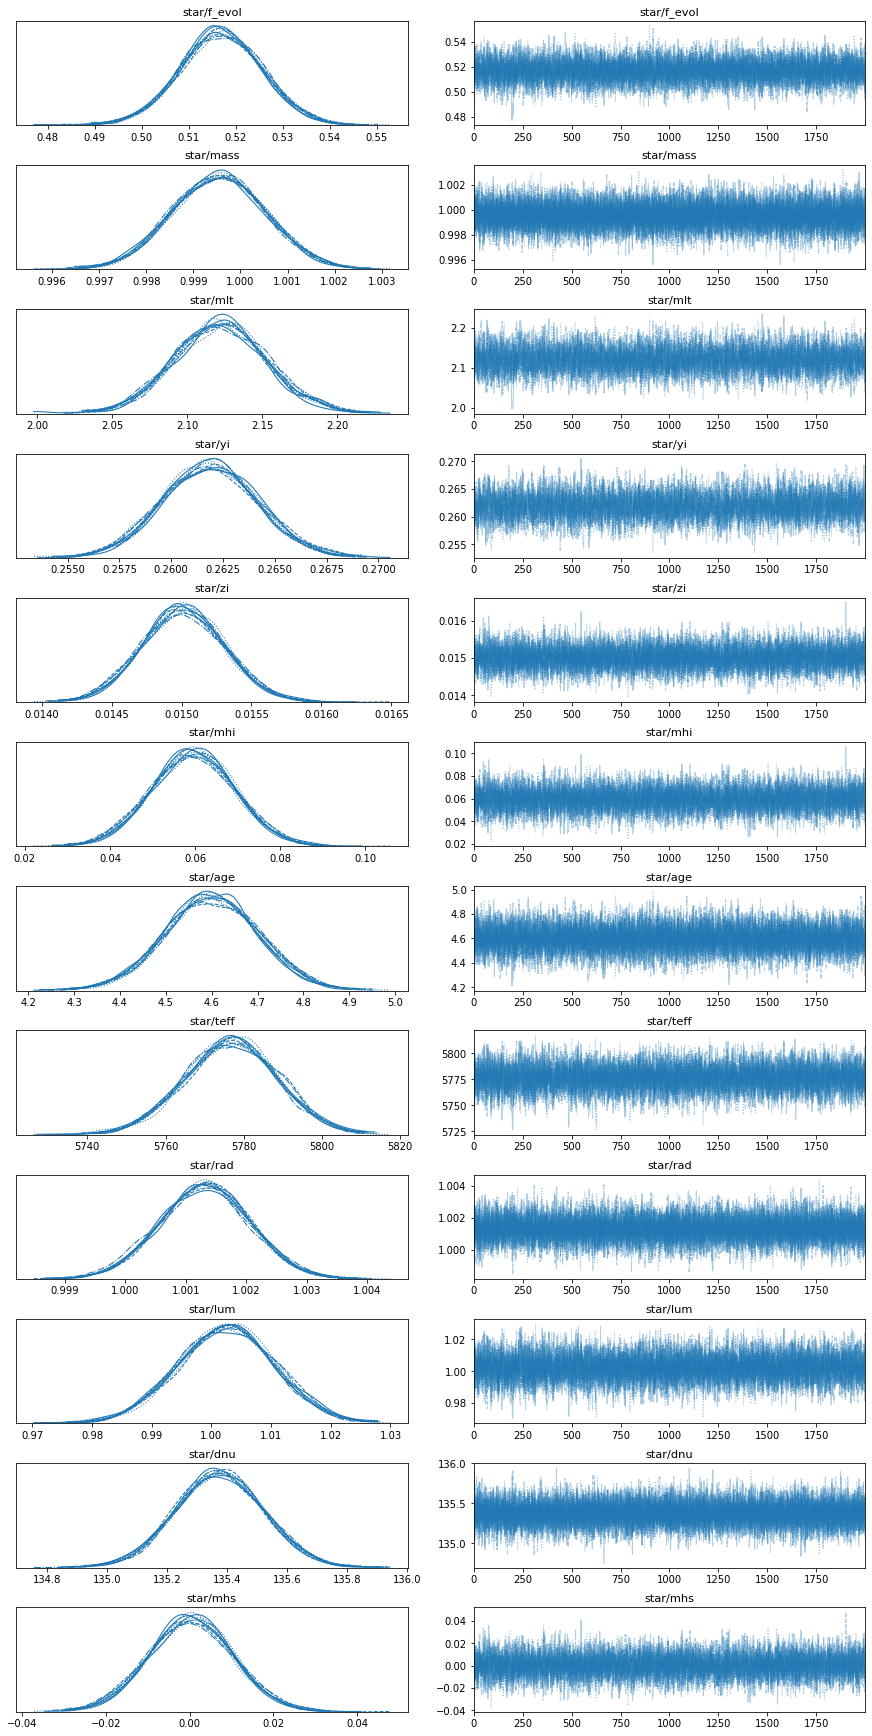

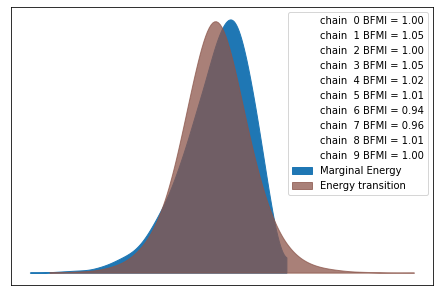

In [12]:
stars.plot_diagnostics(save=True);

In [13]:
stars.plot_corners(save=True)

In [15]:
output = stars.get_results()['star']
output.head()

,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,f_evol_mcse_mean,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,0.508369,0.516752,0.525287,6867.561222,6835.020599,6835.020599,8636.145873,0.500683,0.533182,0.000104,...,6560.933011,6560.933011,8366.3345,-0.018809,0.018475,0.000122,0.000086,0.000169,1.000672,0.009882


In [79]:
import numpy as np
import corner

from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'corner'

In [67]:
import importlib
corner = importlib.reload(corner)

AttributeError: 'NoneType' object has no attribute 'name'

In [17]:
%matplotlib inline

In [21]:
posterior = stars.get_trace().posterior

In [25]:
var_names = stars.get_varnames()
var_names

['star/f_evol',
 'star/mass',
 'star/mlt',
 'star/yi',
 'star/zi',
 'star/mhi',
 'star/age',
 'star/teff',
 'star/rad',
 'star/lum',
 'star/dnu',
 'star/mhs']

In [32]:
n_samples = sample_kwargs['num_chains'] * sample_kwargs['num_samples']

In [38]:
xs = np.zeros((len(var_names), n_samples))
for i, name in enumerate(var_names):
    xs[i] = posterior[name].values.flatten()

In [45]:
labels = [
    r'$f_\mathrm{evol}$',
    r'$M\,(\mathrm{M}_\odot)$',
    r'$\alpha_\mathrm{MLT}$',
    r'$Y_\mathrm{init}$',
    r'$Z_\mathrm{init}$',
    r'$[\mathrm{M/H}]_\mathrm{init}\,(\mathrm{dex})$',
    r'$\tau\,(\mathrm{Gyr})$',
    r'$T_\mathrm{eff}\,(\mathrm{K})$',
    r'$R\,(\mathrm{R}_\odot)$',
    r'$L\,(\mathrm{L}_\odot)$',
    r'$\Delta\nu\,(\mu\mathrm{Hz})$', 
    r'$[\mathrm{M/H}]_\mathrm{surf}\,(\mathrm{dex})$',
]

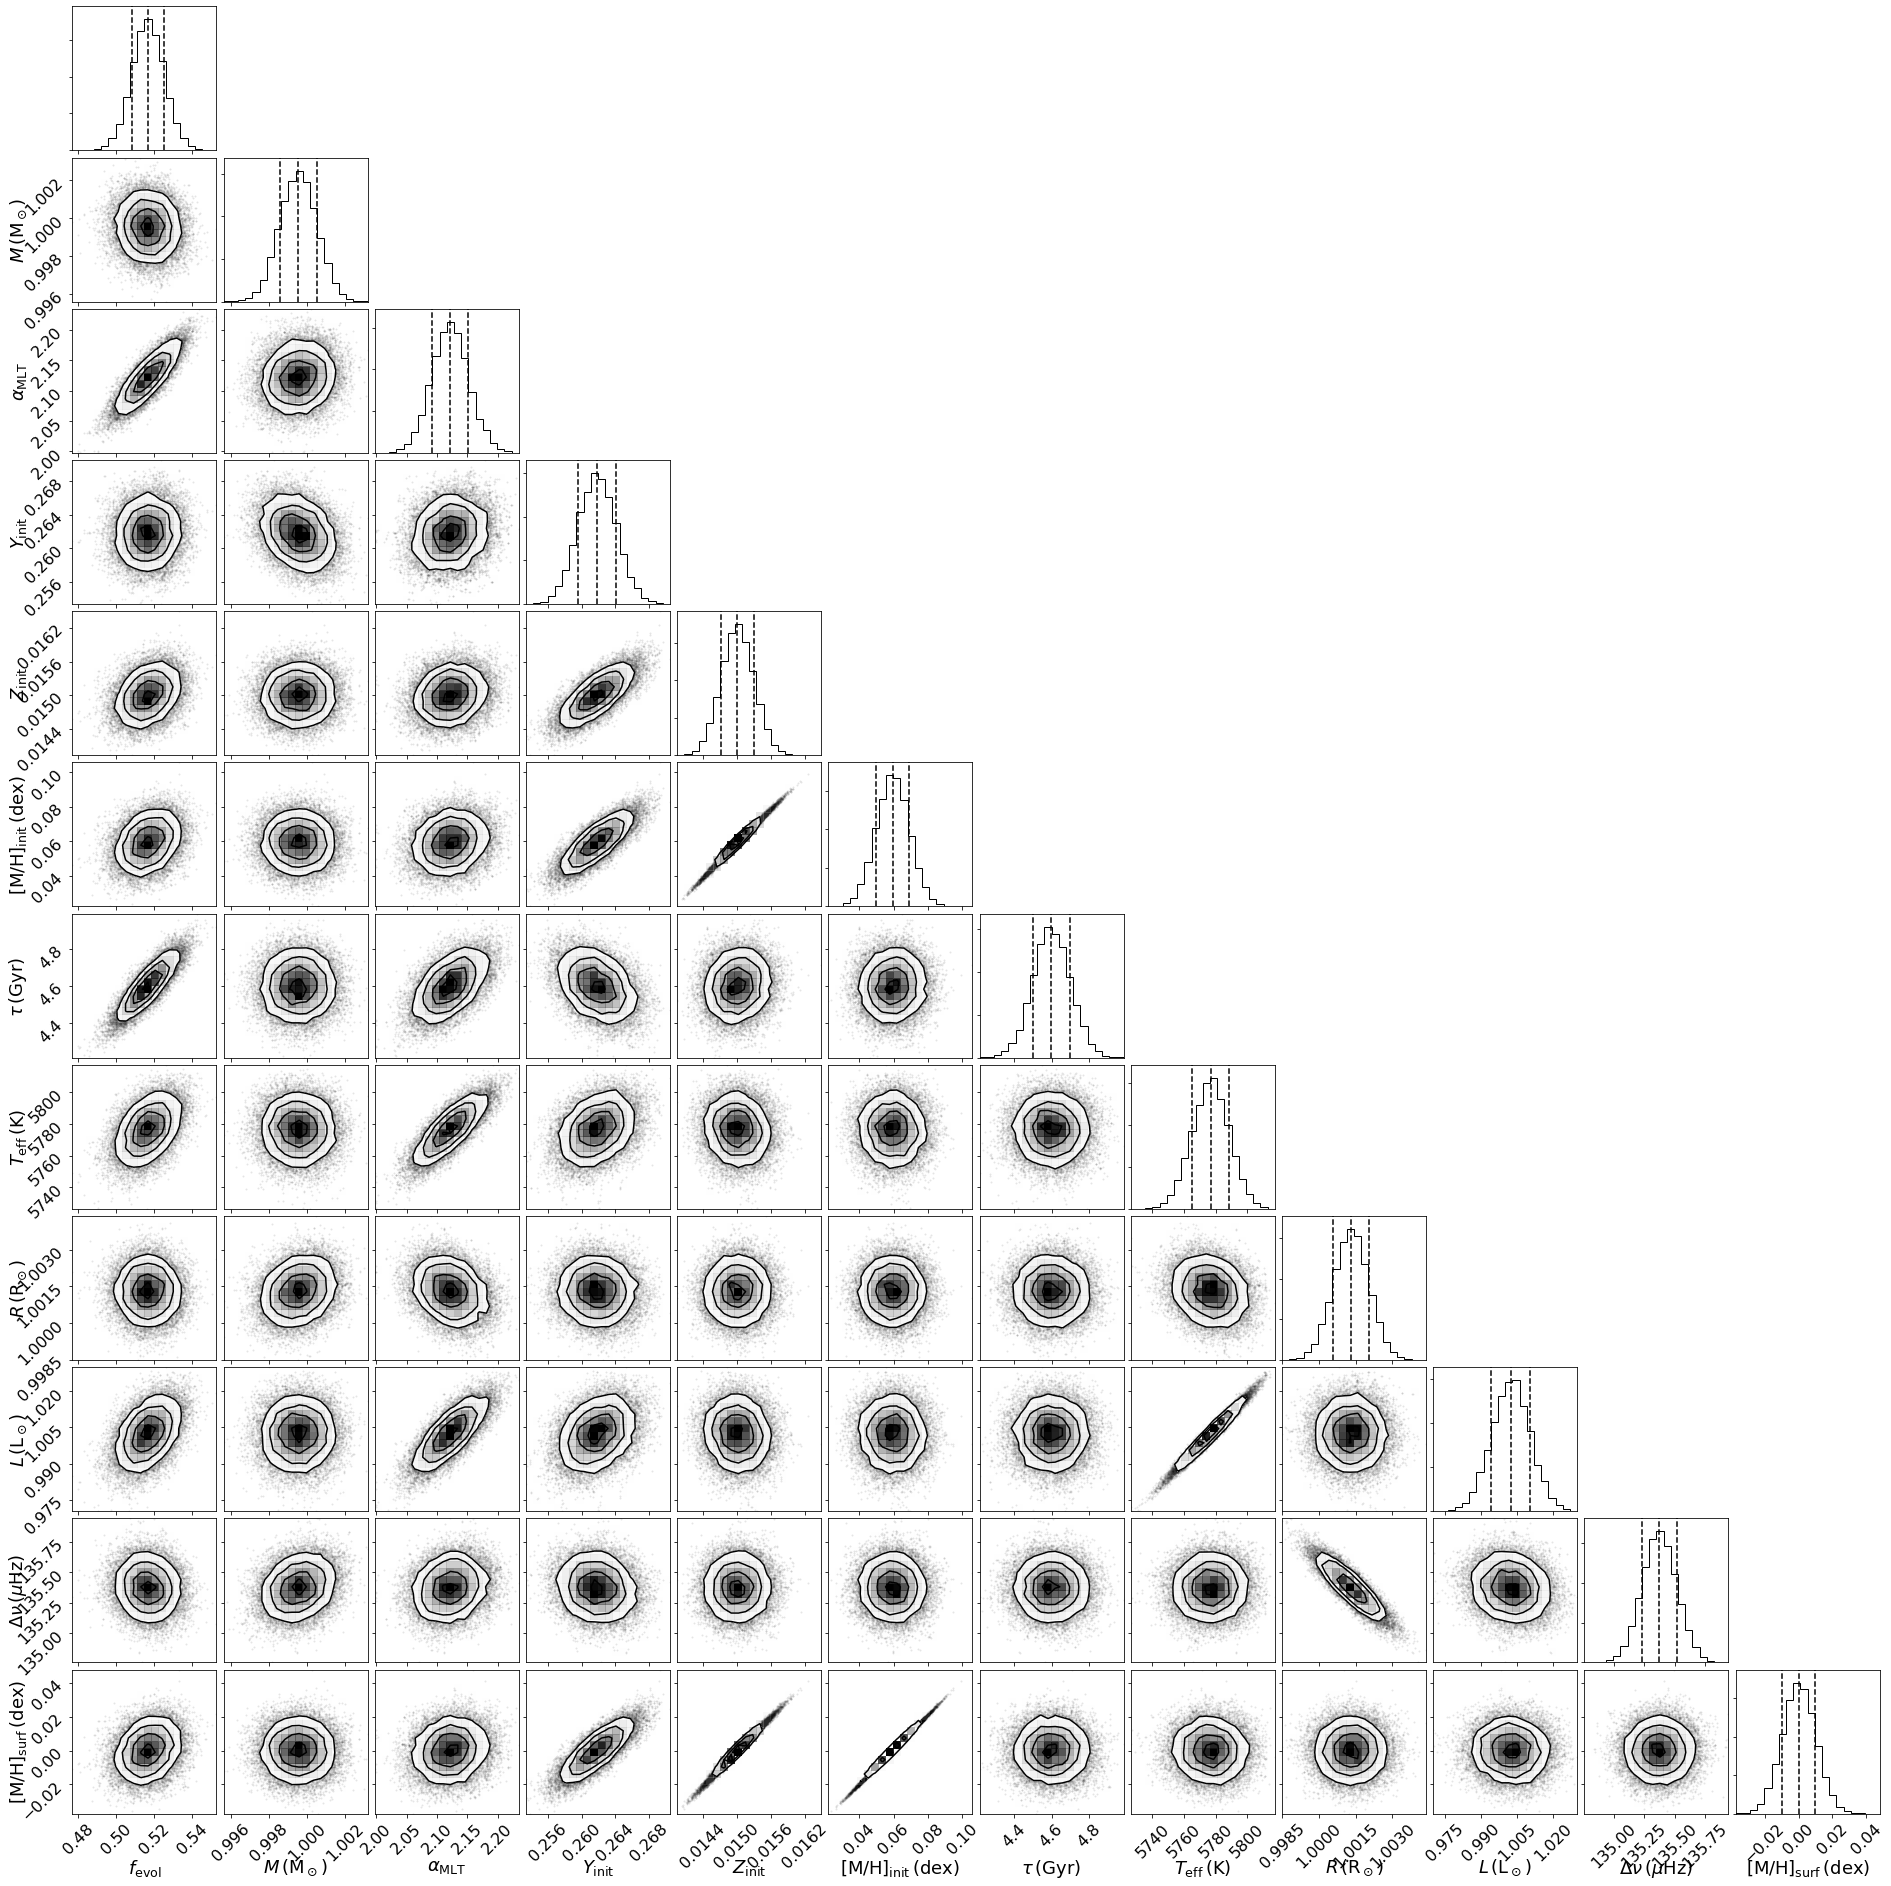

In [64]:
# plt.rc('axes', titlesize=16.)
plt.rc('axes', labelsize=18.)
plt.rc('xtick', labelsize=16.)
plt.rc('ytick', labelsize=16.)

fig = corner.corner(xs.T, labels=labels, labelpad=50., show_titles=False, quantiles=[.16, .5, .84])
# for ax in fig.get_axes():
#     ax.xaxis.labelpad = 20.